# Linear Regression by Gradient Descent

You would normally use the least squares method for linear regression. But let's do it using gradient descent.

We are using the the NBA players dataset. (very similar to the EPL data set we looked at before)

In [1]:
# this will help us plot things nicely
def plot_data_and_line(a,b):
    XX = np.linspace(-10,10,200).reshape((-1,1))
    YY = f(a,b,XX)

    plt.scatter(heights, weights, alpha=0.2)
    plt.plot(XX,YY,"r")
    plt.show()

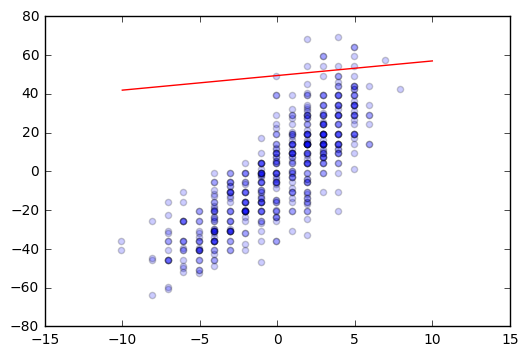

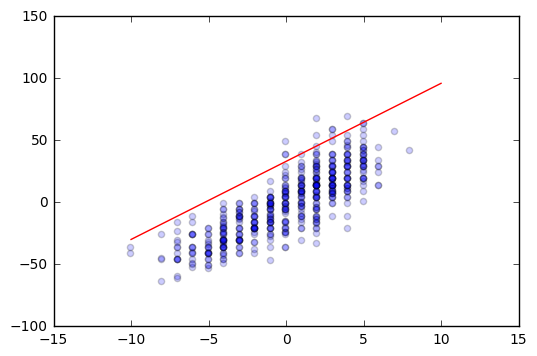

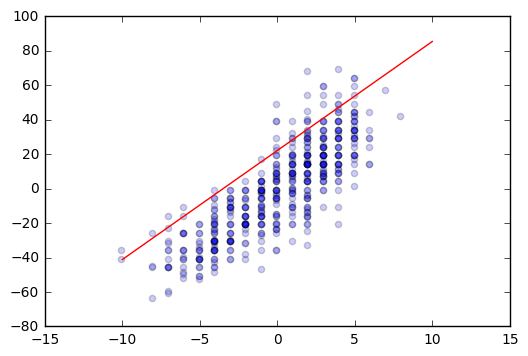

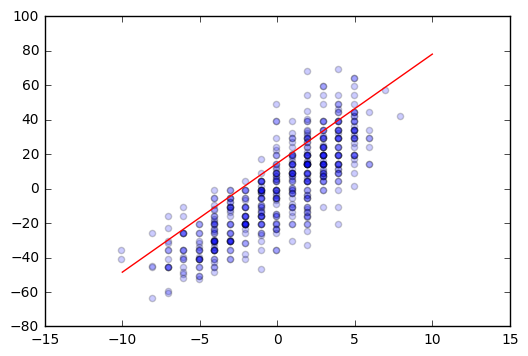

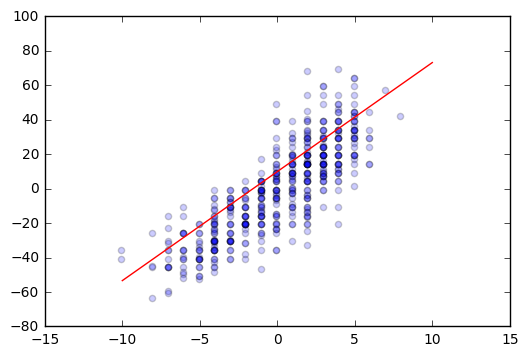

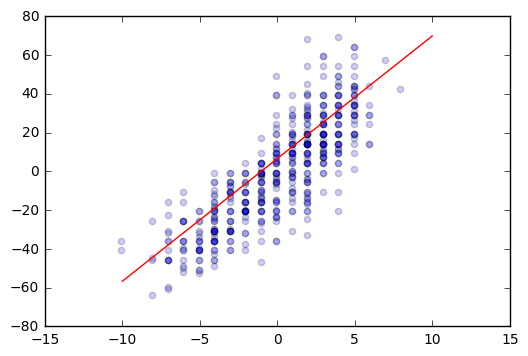

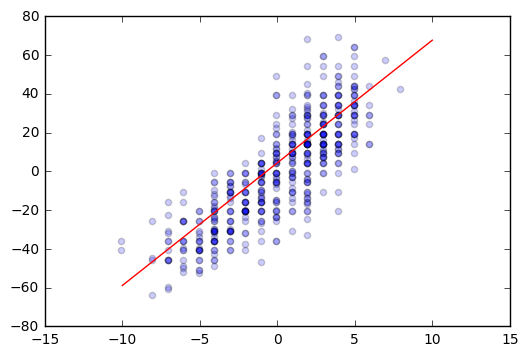

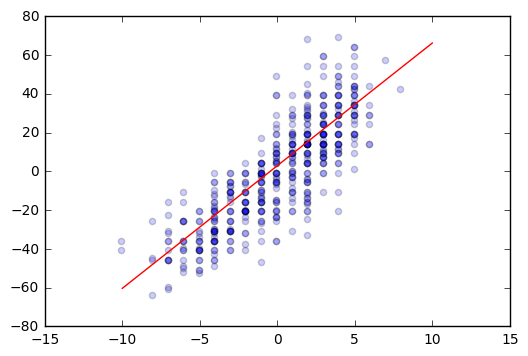

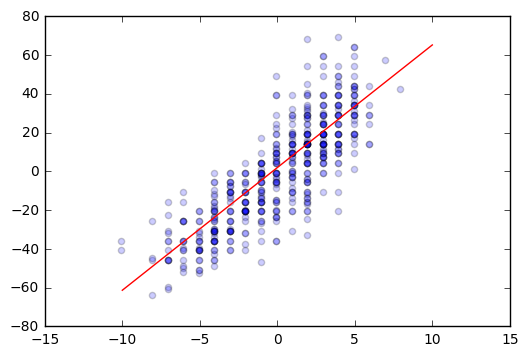

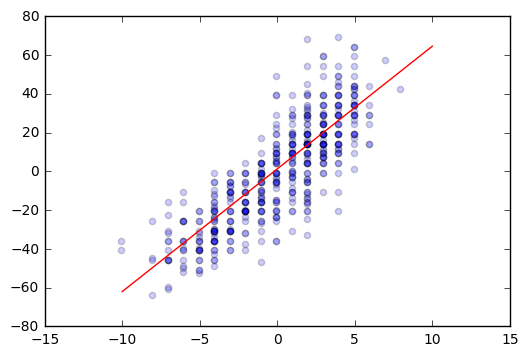

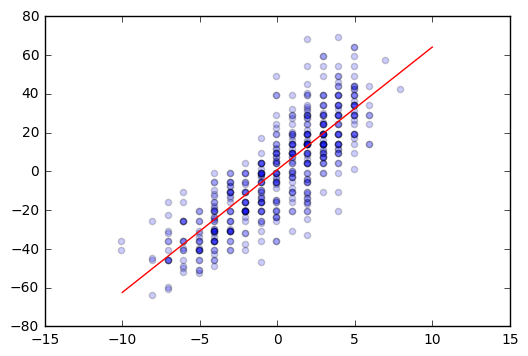

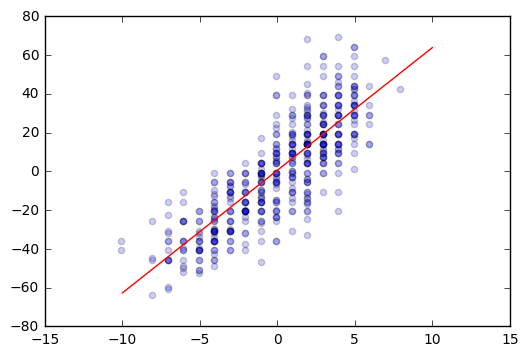

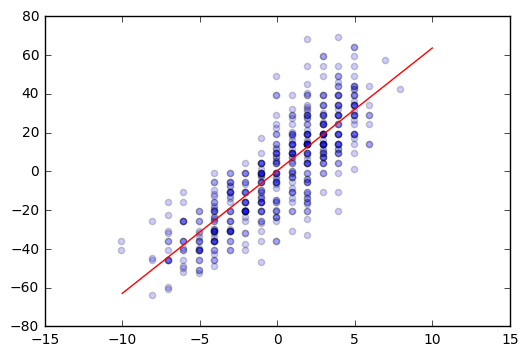

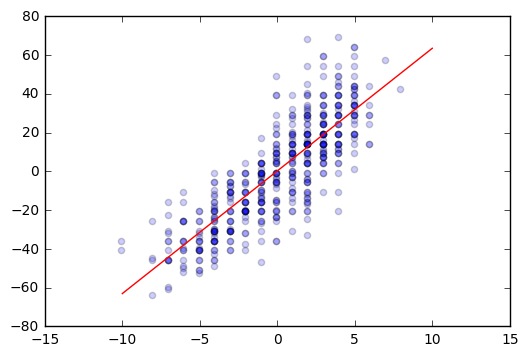

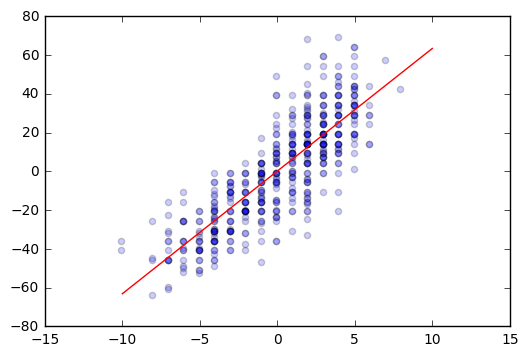

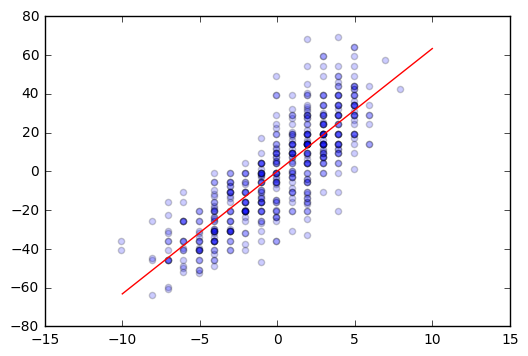

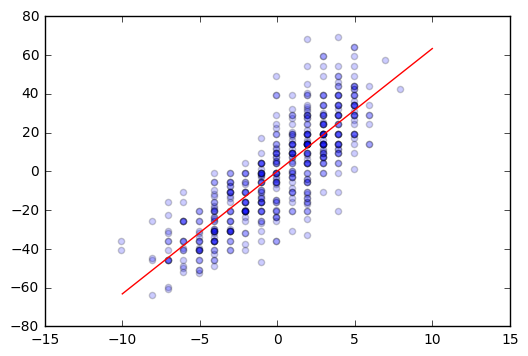

final error:  231.266273187


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# load data
with open('nba_data.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)

# one less because first row of csv file is labels
N = len(data_list) - 1

heights = np.zeros(N)
ages = np.zeros(N)
weights = np.zeros(N)

# fill heights ages weights arrays
for i in range(1, N+1):
    heights[i-1] = data_list[i][2]
    ages[i-1] = data_list[i][4]
    weights[i-1] = data_list[i][3]

heights_mean = np.mean(heights)
weights_mean = np.mean(weights)
ages_mean = np.mean(ages)
    
heights = heights - heights_mean
weights = weights - weights_mean
ages = ages - ages_mean
    
# this is our model, weight is a linear function of height and age
def f(a, b, x):
    return a * x + b

# total error on the whole data set
def error_on_data(a,b):
    return sum([(f(a, b, heights[i]) - weights[i])**2 for i in range(N)]) / N

# numerical partial derivatives
h = 0.0000001
def numdela(fu):
    return (lambda a,b: (fu(a + h, b) - fu(a, b)) / h)
def numdelb(fu):
    return (lambda a,b: (fu(a, b + h) - fu(a, b)) / h)

eta = 0.005  # learning rate
num_steps = 601

a = 0.0
b = 50.0
error_amounts = []
for i in range(num_steps):
    error_amounts.append(error_on_data(a,b))
    da, db = numdela(error_on_data)(a,b), numdelb(error_on_data)(a,b)
    a = a - eta * da
    b = b - eta * db
    if i % 40 == 0:
        plot_data_and_line(a,b)
    
plot_data_and_line(a,b)
    
print("final error: ", error_on_data(a,b))

### Let's do the same thing, but using both weight and age

In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# load data
with open('nba_data.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)

# one less because first row of csv file is labels
N = len(data_list) - 1

heights = np.zeros(N)
ages = np.zeros(N)
weights = np.zeros(N)

# fill heights ages weights arrays
for i in range(1, N+1):
    heights[i-1] = data_list[i][2]
    ages[i-1] = data_list[i][4]
    weights[i-1] = data_list[i][3]
    
# this is our model, weight is a linear function of height and age
def f(a,b,c,height,age):
    return a*height + b*age + c

# numerical partial derivatives
h = 0.00001
def numdela(fu):
    return (lambda a,b,c: (fu(a+h,b,c)-fu(a,b,c))/h)
def numdelb(fu):
    return (lambda a,b,c: (fu(a,b+h,c)-fu(a,b,c))/h)
def numdelc(fu):
    return (lambda a,b,c: (fu(a,b,c+h)-fu(a,b,c))/h)

# total error on the whole data set
def error_on_data(a,b,c):
    return sum([(f(a,b,c, heights[i], ages[i]) - weights[i])**2 for i in range(N)])


eta = 0.000000001  # learning rate
num_steps = 500

a = 0.0
b = 0.0
c = 0.0
error_amounts = []
for i in range(num_steps):
    error_amounts.append(error_on_data(a,b,c))
    da, db, dc = numdela(error_on_data)(a,b,c), numdelb(error_on_data)(a,b,c), numdelc(error_on_data)(a,b,c)
    a = a - eta * da
    b = b - eta * db
    c = c - eta * dc
    
print("final error: ", error_on_data(a,b,c))

final error:  221726.932717


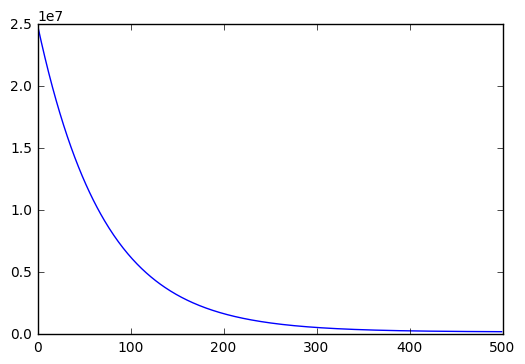

In [4]:
plt.plot(range(num_steps), error_amounts)
plt.show()